In [21]:
# %load /Users/wayment/ipynb_defaults.py
%pylab inline
import numpy as np
import pandas as pd
import os,sys
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

sys.path.append('../../../scripts/')
from utils import load_fasta
import logomaker

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_json('1LU4A_3recycles_feats.json.zip')
metad = pd.read_csv('1LU4A_cluster_metadata.tsv',delimiter='\t')

df['cluster_ind'] = [os.path.basename(x.replace('.pdb','')).split('_')[-1] for x in df['pdb']]
metad['cluster_ind'] = ['%03d' % x for x in metad['cluster_ind']]

df = df.merge(metad, on='cluster_ind')

In [46]:
 # get representative clusters of first and second state

state_1 = df.loc[df['PC 1']< -20][df['PC 2']<0][df['mean_pLDDT']>80]
print(len(state_1))

state_2 = df.loc[df['PC 1']> 20][df['PC 2']<0][df['mean_pLDDT']>70]
print(len(state_2))

bkgd = pd.concat([df.loc[df['PC 2']>0], df.loc[df['PC 2']<0][df['PC 1']>-20][df['PC 1']<30]])

287
154


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_33868/3176264467.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_1 = df.loc[df['PC 1']< -20][df['PC 2']<0][df['mean_pLDDT']>80]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_33868/3176264467.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_2 = df.loc[df['PC 1']> 20][df['PC 2']<0][df['mean_pLDDT']>70]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_33868/3176264467.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = pd.concat([df.loc[df['PC 2']>0], df.loc[df['PC 2']<0][df['PC 1']>-20][df['PC 1']<30]])


In [49]:
def load_single_seq(pdb):
    msa_path = 'msas/'+os.path.basename(pdb).replace('pdb','a3m')
    names, seqs = load_fasta(msa_path)
    return [seqs[1]]

tmp = [load_single_seq(x) for x in state_1['pdb']]
state_1_seqs = [inner for outer in tmp for inner in outer] 

tmp = [load_single_seq(x) for x in state_2['pdb']]
state_2_seqs = [inner for outer in tmp for inner in outer] 

In [34]:
len(state_1_pssm.keys())

21

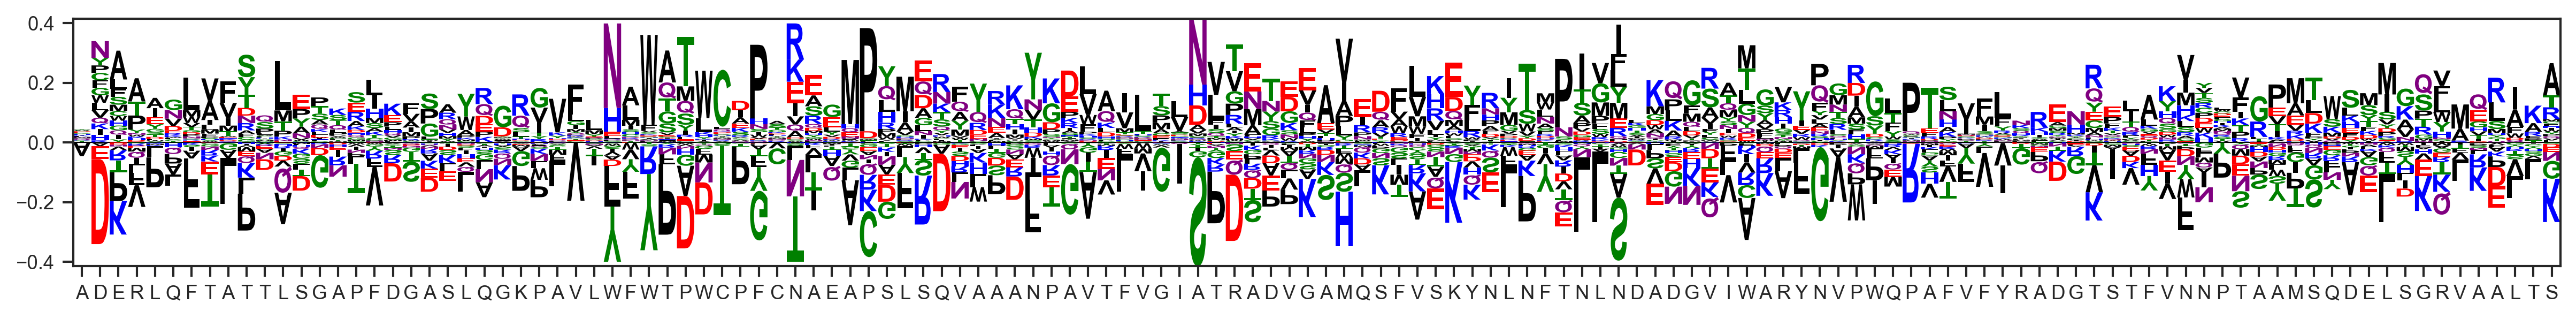

In [50]:
wt='ADERLQFTATTLSGAPFDGASLQGKPAVLWFWTPWCPFCNAEAPSLSQVAAANPAVTFVGIATRADVGAMQSFVSKYNLNFTNLNDADGVIWARYNVPWQPAFVFYRADGTSTFVNNPTAAMSQDELSGRVAALTS'

state_1_pssm = logomaker.alignment_to_matrix(state_1_seqs, to_type='probability',characters_to_ignore='U-')
state_2_pssm = logomaker.alignment_to_matrix(state_2_seqs,to_type='probability',characters_to_ignore='-')

tmp = np.subtract(state_2_pssm, state_1_pssm)

logomaker.Logo(tmp,color_scheme='chemistry',figsize=(20,2))
xticks(range(136), wt)
show()

L12: enriched for alt state

orig state: L12A

K76: enriched for orig state

alt state: K76E

